# Principal Component Analysis (PCA) Walkthrough (Dynamic Rollover)

Principal Component Analysis (PCA) is a dimensionality-reduction technique that transforms high-dimensional data into a new coordinate system of orthogonal components, which are linear combinations of the original features.


In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pathlib import Path

In [2]:
# this is the path to your pickle file (should be the same location as CSVs)
path = Path('../../data')

with open(path / 'data/dynamic_rollover_pandas_2.0.2.pkl', 'rb') as file:
    df = pickle.load(file)

## Data Preprocessing

PCA is sensitive to data scale. Hence, we'll normalize our data to have a mean = 0 and variance = 1.


In [9]:
features = df.drop('Dynamic Rollover', axis=1).columns
X = df.drop('Dynamic Rollover', axis=1).values
X = StandardScaler().fit_transform(X)

## Applying PCA

We will first compute PCA without reducing the dimensionality to understand the explained variance by each component.

In [6]:
pca = PCA()
principalComponents = pca.fit_transform(X)

## Visualize Component Variance

Visualizing explained variance informs us how many components might be necessary.

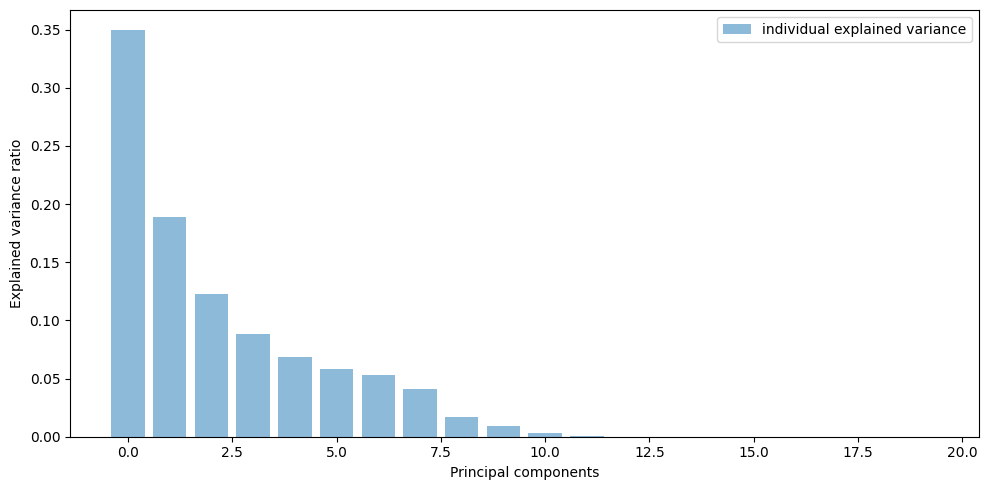

In [7]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

## Scree Plot

The scree plot helps to visualize the proportion of variance explained by each component, making it easier to choose the right number of components.

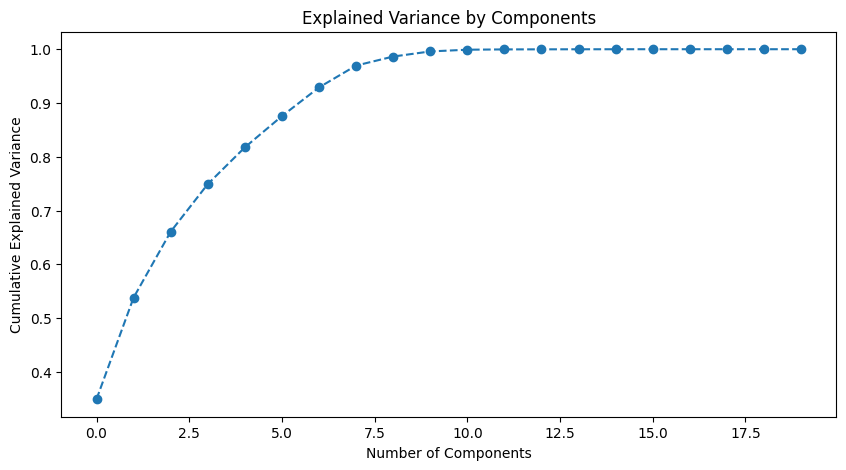

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

## Feature Loadings

Let's explore how each original feature contributes to the principal components.


In [12]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(features) + 1)], index=features)
display(loadings)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Altitude(MSL),0.192622,0.337843,0.257267,-0.189359,0.044659,-0.193694,-0.032675,-0.145619,-0.079634,0.820702,0.041581,-0.002621,-0.008027,0.046402,-0.028442,0.016577,2.455495e-08,-2.185682e-16,-6.931639e-26,0.0
Altitude(AGL),-0.255014,-0.305286,-0.259547,0.180748,-0.056122,0.183535,0.030995,0.124593,-0.006955,0.350552,0.006657,-0.002273,-0.632981,0.217642,-0.039109,0.340394,2.198753e-05,3.486135e-16,5.647937e-22,0.0
Roll Acceleration,0.364862,0.103627,0.227366,0.017337,0.001484,0.024359,0.040248,0.061208,0.046522,-0.185011,-0.000267,0.017423,0.078183,-0.049975,0.050388,0.866218,4.381670e-05,-1.192611e-16,1.732435e-21,0.0
Pitch Acceleration,0.290811,-0.237448,0.033338,0.274995,-0.068676,0.273002,0.110582,0.259423,0.054184,0.214255,0.002530,-0.021741,0.235943,-0.062837,-0.005574,-0.120642,-7.071179e-01,-3.633981e-15,-2.112266e-17,0.0
Yaw Acceleration,0.179338,0.283898,-0.474977,0.039798,-0.033810,0.044051,0.001627,0.050900,-0.003004,-0.002583,0.497476,0.637475,0.019734,-0.006378,-0.006688,-0.005299,7.411109e-07,9.976828e-17,2.652985e-23,0.0
Roll,0.195794,0.302273,-0.443394,0.024293,-0.027572,0.026692,0.002082,0.036743,-0.001963,-0.028928,0.299570,-0.760749,-0.028023,-0.004017,0.011530,0.004816,-7.865320e-06,-3.277308e-17,-2.422716e-22,0.0
Pitch,-0.112289,0.145163,0.024913,0.500652,0.406891,-0.302094,-0.128821,0.028732,0.662245,0.045960,-0.003912,0.001141,-0.001932,-0.007578,0.006638,-0.001299,1.738439e-05,-1.671516e-17,5.188165e-22,0.0
Yaw,0.003385,0.076245,0.072673,-0.046832,0.073778,0.436135,-0.888541,0.038216,-0.004656,0.004347,-0.003437,-0.002317,0.004051,-0.000496,-0.000662,-0.001623,-1.763836e-05,2.848841e-18,-5.260855e-22,0.0
Roll Rate,0.183206,0.306596,-0.439097,0.021021,-0.037696,0.033271,0.008499,0.052760,-0.005152,0.033866,-0.812811,0.109382,-0.001144,0.000698,0.000616,0.001160,4.089651e-06,-6.853340e-17,1.218187e-22,0.0
Pitch Rate,-0.040857,-0.013523,-0.030510,-0.268606,0.670328,-0.085074,0.052593,0.627765,-0.267216,-0.005642,0.003285,-0.000988,-0.003000,-0.007151,0.011283,-0.000977,-3.634817e-06,-8.421096e-18,-1.077817e-22,0.0


## Visualizing First Two Principal Components

A 2D scatter plot provides a visualization of data in the new component space.

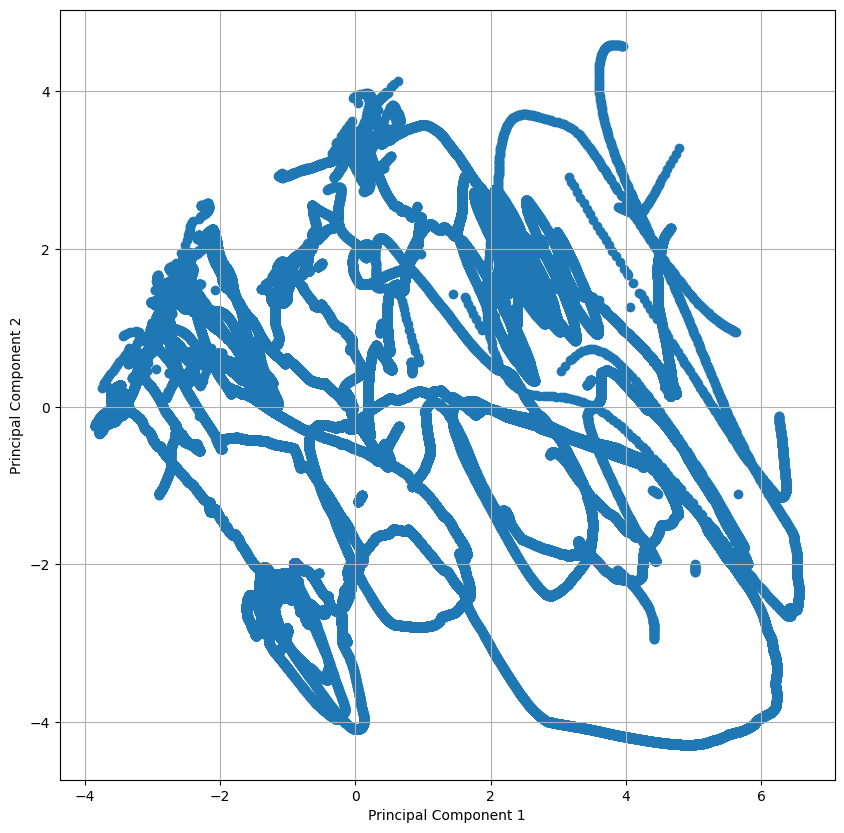

In [11]:
principal_df = pd.DataFrame(data=principalComponents, columns=[f'PC{i}' for i in range(1, len(features) + 1)])

plt.figure(figsize=(10, 10))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Conclusion

From our PCA analysis, several key insights emerged:

1. **Variance Explained by Individual Components**: The first principal component accounted for 35% of the variance, while the second component explained an additional 19%. This suggests that while there is some structure in the data, there isn't a single dominant trend or pattern.

2. **Scree Plot Analysis**: The scree plot started to level off after about 9 components. This indicates that considering more than 9 components might not add much value in terms of explaining the variance in the data. Therefore, if dimensionality reduction is a primary concern, focusing on these 9 components might be an efficient approach.

3. **Linearity in Principal Components**: The visualization of the first two principal components showed no clear linear relationship. This suggests that the data might have complex interactions that are not easily captured by linear methods alone.

Given these findings, if our aim is dimensionality reduction for subsequent analyses or modeling, we might consider using the first 9 components. However, given the lack of clear linear patterns, it's essential to be cautious when using linear modeling techniques on the transformed data. Exploring non-linear methods or other dimensionality reduction techniques might also provide further insights into the dataset's underlying structure.
